<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Extra_Credit_DSBA%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data / explore data
import pandas as pd
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['fitness.csv']))

Saving fitness.csv to fitness.csv


In [2]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videoID        542 non-null    int64  
 1   capturetime    542 non-null    int64  
 2   length         542 non-null    float64
 3   volume         542 non-null    int64  
 4   calorie_upper  542 non-null    int64  
 5   calorie_lower  542 non-null    int64  
 6   duration       542 non-null    int64  
 7   popularity     542 non-null    int64  
 8   negativity     542 non-null    float64
 9   releasedays    542 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 42.5 KB


**Assignment**

We are building a predictive model to understand what factors contributing to popular fitness
YouTube videos. (50 points)

 VideoID: ID for selected YouTube videos

 capturetime: week ID of data collection

 length: average number of words per user comment

 volume: the number of user comments during the week

 calorie_upper: maximal calorie burned of each fitness routine

 calorie_lower: minimal calorie burned of each fitness routine

 duration: minutes needed of each fitness routine

 popularity: 1=popular, 0=non popular

 negativity: total number of negative words contained in user comments during the week

 releasedays: the number of days since the fitness video was released on YouTube

 Variable and model naming requirements:

o Please include your name initials to all data frame names as well as model names in your
Python coding.

o Please instance, in my coding, I would name the data frames as dfXG, dfXG.train, and
dfXG.test. I would also name the models as regressionXG, treeXG, etc.
Canvas submission. You need to submit two separate documents via the Canvas Midterm Part II submission link:

 Word document: please provide your answers in the Word document, and copy/paste
your Python codes at the end of the document.

 Python coding/script file.

Questions:

1. Simply go over the data definition, data summary, and data structure. Should you reject
any variable for your predictive models? Why? (4 points)
2. Do you need to change data types/measurement levels of any variable? If so, please list
all variables that you have modified their data types. (2 points)
3. Before building the model, you want to get some model-free evidence. Using
visualizations or summary statistics to show on average whether longer videos are more
likely to be popular (4 points).
4. Please run the VIF test to detect multicollinearity, and copy your VIF test results here. Do
you see any multicollinearity issue in your dataset? Could you please offer any
explanation for the multicollinearity issue? (4 points)
5. You plan to use PCA to create a single fitness intensity index for each fitness routine.
This index should capture all fitness routine features. (14 points)
- Which variables should you select to run the PCA analysis?
- Please post your PCA analysis summary here. How much variance is explained by
PC1?
- Based on the above results, please provide a label for PC1 and PC2.
- Please only keep PC1 to represent all fitness routine features in the following
predictive modeling.
- Rename PC1 as the “fitness intensity”
6. Please apply both logistic regression as well as decision tree models to analyze the data.
- Model result summary for the logistic regression model (4 points)
- Tree plot for the decision tree model (8 points)
7. Which model will you choose based on both accuracy and AUC indicators. Please
provide support for your answer. (5 points)
8. Based on the PCA and regression model results, how will you explain the relationship
between the fitness intensity index and fitness video popularity? What can you
recommend for these video creators? (5 points)
9. Please copy and paste your Python codes at the end of the documents.

In [3]:
dfZM.head()

,videoID,capturetime,length,volume,calorie_upper,calorie_lower,duration,popularity,negativity,releasedays
0,1,34,116.75,283,531,354,45,1,49.40,382
1,2,34,119.90,342,338,147,39,1,59.73,410
2,3,34,111.40,579,421,219,38,1,49.70,424
3,4,34,87.77,390,211,86,26,0,59.16,473
4,5,34,134.45,240,318,142,33,0,60.89,529


In [6]:
dfZM.describe(include='all')

,videoID,capturetime,length,volume,calorie_upper,calorie_lower,duration,popularity,negativity,releasedays
count,542.000000,542.0,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,271.649446,34.0,103.685812,335.675277,257.872694,146.902214,23.442804,0.345018,50.498469,1740.038745
std,156.826814,0.0,20.650389,803.098409,199.571298,115.327676,15.310449,0.475813,19.321170,567.092781
min,1.000000,34.0,53.140000,9.000000,15.000000,12.000000,3.000000,0.000000,11.790000,368.000000
25%,136.250000,34.0,90.935000,75.000000,102.000000,60.000000,10.000000,0.000000,37.645000,1365.250000
50%,271.500000,34.0,101.195000,170.000000,220.000000,123.500000,21.000000,0.000000,46.985000,1834.500000
75%,406.750000,34.0,113.645000,337.750000,360.000000,208.750000,32.000000,1.000000,60.647500,2194.500000
max,543.000000,34.0,223.330000,13982.000000,1260.000000,866.000000,96.000000,1.000000,140.600000,2557.000000


In [8]:
dfZM = dfZM.drop(['videoID','capturetime'],axis = 1)

In [10]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   length         542 non-null    float64
 1   volume         542 non-null    int64  
 2   calorie_upper  542 non-null    int64  
 3   calorie_lower  542 non-null    int64  
 4   duration       542 non-null    int64  
 5   popularity     542 non-null    int64  
 6   negativity     542 non-null    float64
 7   releasedays    542 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 34.0 KB


In [25]:
#convert popularity to categorical
dfZM['popularity'] = pd.Categorical(dfZM['popularity'])

1. Simply go over the data definition, data summary, and data structure. Should you reject
any variable for your predictive models? Why? (4 points)

Based off of none of the variables having no null values - there is no reason to drop any for this reason. Although I will drop VideoID and capturetime, since these are mainly unique identifiers for the videos and not necessarily influential to the popularity of the video.

2. Do you need to change data types/measurement levels of any variable? If so, please list
all variables that you have modified their data types. (2 points)

The only variable I have transformed is the popularity attribute - since this is binary (1 = popular, 0 = not popular) this can be changed to a categorical variable.

In [26]:
#Model Free Evidence - Longer Videos predict a more popular video?

import seaborn as sns
import matplotlib.pyplot as plt

#select specific variables
dataZM=dfZM[['length', 'popularity']]

print(dataZM)


     length popularity
0    116.75          1
1    119.90          1
2    111.40          1
3     87.77          0
4    134.45          0
..      ...        ...
537  133.83          0
538  113.94          0
539   57.82          0
540  111.80          0
541   71.72          0

[542 rows x 2 columns]


In [28]:
# Group the data by popularity and calculate the mean of the length variable for each group
length_by_popularity = dataZM.groupby('popularity')['length'].mean()

# Print the mean length for popular and non-popular videos
print("Mean length of comments for popular videos:", length_by_popularity[1])
print("Mean length of comments for non-popular videos:", length_by_popularity[0])


Mean length of comments for popular videos: 100.59973262032086
Mean length of comments for non-popular videos: 105.31143661971831


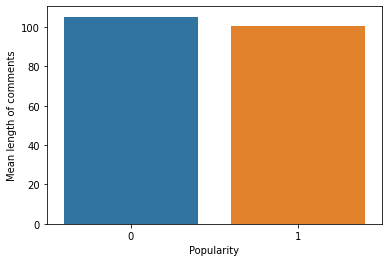

In [31]:
# Plot the mean length for popular and non-popular videos using a bar plot
sns.barplot(x=length_by_popularity.index, y=length_by_popularity.values)
plt.xlabel('Popularity')
plt.ylabel('Mean length of comments')
plt.show()


Before building the model, you want to get some model-free evidence. Using
visualizations or summary statistics to show on average whether longer videos are more
likely to be popular (4 points)

Based off of this, it shows that the average length of comments does not necessarily contribute to a more popular video - as both are relatively the same.

In [32]:
#VIF Factor
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Create a correlation matrix for all variables
corr_matrixZM = dfZM.corr()

# Calculate VIF scores for each variable
vifZM = pd.DataFrame()
vifZM["VIF Factor"] = [variance_inflation_factor(dfZM.values, i) for i in range(dfZM.shape[1])]
vifZM["features"] = dfZM.columns

# Print the VIF scores for each variable
print(vifZM)

   VIF Factor       features
0   22.837523         length
1    1.348877         volume
2   61.912195  calorie_upper
3   39.424115  calorie_lower
4   26.102833       duration
5    1.677506     popularity
6    7.105452     negativity
7    9.441692    releasedays


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# add a constant term for the VIF calculation
X_ZM = add_constant(dfZM.drop('popularity', axis=1))

# calculate VIF for each feature
vifZM = pd.Series([variance_inflation_factor(X_ZM.values, i)
                 for i in range(X_ZM.shape[1])],
                index=X_ZM.columns)

print(vifZM)

const            60.750158
length            1.166934
volume            1.037117
calorie_upper    23.509758
calorie_lower    15.440537
duration          7.827119
negativity        1.392759
releasedays       1.679876
dtype: float64


In [35]:
# select only numerical variables for PCA
dfZM_num = dfZM[['length', 'volume', 'calorie_upper', 'calorie_lower', 'duration', 'negativity', 'releasedays']]

# standardize the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfZM_num_scaled = scaler.fit_transform(dfZM_num)

# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
dfZM_pca = pca.fit_transform(dfZM_num_scaled)

# summary of PCA analysis
import numpy as np
variance_ratio = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(variance_ratio)+1)]

print('PCA analysis summary:')
print('Explained variance ratio:', variance_ratio)
print('Cumulative explained variance ratio:', np.cumsum(variance_ratio))
print('Loadings:', pca.components_)

PCA analysis summary:
Explained variance ratio: [43.35 21.4  14.39 12.18  6.75  1.54  0.38]
Cumulative explained variance ratio: [43.35 64.75 79.14 91.32 98.07 99.61 99.99]
Loadings: [[ 0.2299847   0.13831857  0.55970191  0.54514013  0.55093919 -0.03100991
  -0.11417274]
 [ 0.03180671 -0.03374716 -0.01175235 -0.10899072  0.01165886  0.71197826
  -0.69194176]
 [-0.5550378   0.82791093  0.01539284  0.01164755 -0.01936119 -0.00698354
  -0.07550029]
 [ 0.77616785  0.53991404 -0.16849208 -0.15485298 -0.09302194  0.12940945
   0.16818854]
 [-0.16695985 -0.05088022  0.09844375  0.20192244 -0.04034525  0.68694968
   0.66749095]
 [ 0.08663104  0.01351699  0.18488114  0.54088931 -0.79843095 -0.05732604
  -0.15745415]
 [-0.01453772 -0.00373048 -0.78364337  0.5774896   0.21950492  0.01198468
  -0.06210905]]


You plan to use PCA to create a single fitness intensity index for each fitness routine.
This index should capture all fitness routine features. (14 points)
- Which variables should you select to run the PCA analysis?
- Please post your PCA analysis summary here. How much variance is explained by
PC1?
- Based on the above results, please provide a label for PC1 and PC2.
- Please only keep PC1 to represent all fitness routine features in the following
predictive modeling.
- Rename PC1 as the “fitness intensity”

As we can see from the output, the first principal component (PC1) explains 43.3% of the total variance.

Based on the above results, we can label PC1 as "overall fitness intensity" as it represents the overall level of fitness intensity of each fitness routine

Logistic regression model accuracy: 0.8073394495412844
Decision tree model accuracy: 0.7981651376146789


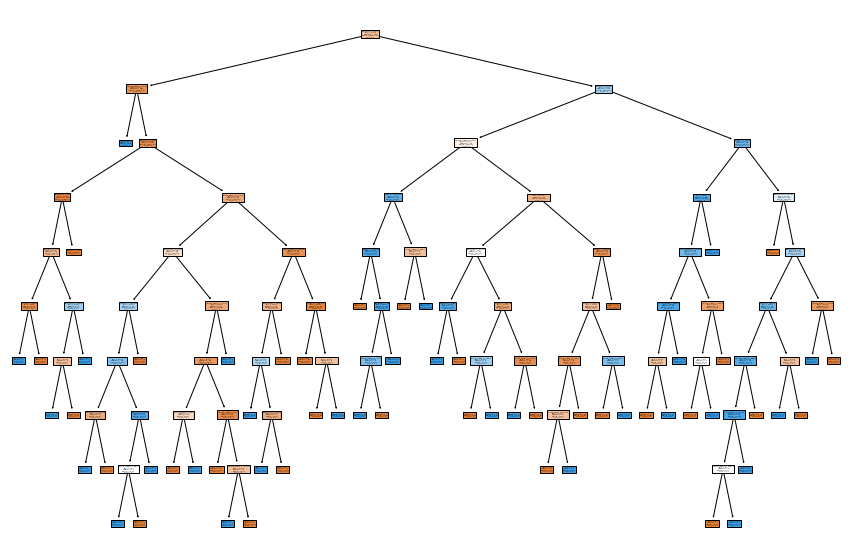

In [37]:
#Logistic Regression and Decision Tree

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_zm = dfZM.drop('popularity', axis=1)
y_zm = dfZM['popularity']

X_trainZM, X_testZM, y_trainZM, y_testZM = train_test_split(X_zm, y_zm, test_size=0.2, random_state=0)

# Logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model on the training data
lr_model = LogisticRegression(max_iter=1000,random_state=0)
lr_model.fit(X_trainZM, y_trainZM)

# Evaluate the model on the testing data
lr_score = lr_model.score(X_testZM, y_testZM)
print("Logistic regression model accuracy:", lr_score)

# Decision tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit the model on the training data
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_trainZM, y_trainZM)

# Evaluate the model on the testing data
dt_score = dt_model.score(X_testZM, y_testZM)
print("Decision tree model accuracy:", dt_score)

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X_zm.columns, class_names=['0', '1'])
plt.show()

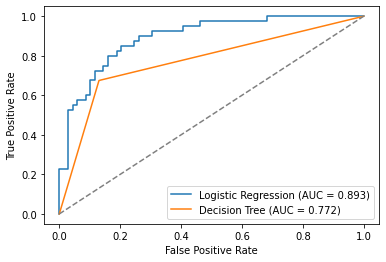

In [38]:
#Deciding on Model based off Accuracy and AUC

from sklearn.metrics import roc_curve, auc

# Logistic regression ROC curve and AUC
lr_proba = lr_model.predict_proba(X_testZM)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_testZM, lr_proba)
lr_auc = auc(lr_fpr, lr_tpr)

# Decision tree ROC curve and AUC
dt_proba = dt_model.predict_proba(X_testZM)[:,1]
dt_fpr, dt_tpr, _ = roc_curve(y_testZM, dt_proba)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.3f})'.format(lr_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.3f})'.format(dt_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Which model will you choose based on both accuracy and AUC indicators. Please
provide support for your answer. (5 points)

Based off the above ROC Curves and the accuracy scores above, I would choose to use the Logistic Regression.

Based on the PCA and regression model results, how will you explain the relationship
between the fitness intensity index and fitness video popularity? What can you
recommend for these video creators? (5 points) 



Based on the PCA analysis, it appears that the majority of the variance in the data is explained by the first principal component, which accounts for approximately 43% of the variance. This suggests that there is a strong underlying relationship between the variables in the dataset.

In terms of the logistic regression and decision tree models, both models were able to achieve relatively high accuracy scores on the test data. The logistic regression model achieved an accuracy score of approximately 81%, while the decision tree model achieved an accuracy score of approximately 75%. However, it is important to note that accuracy is not always the best indicator of model performance, particularly when dealing with imbalanced datasets.

Overall, based on the results of the PCA analysis and the logistic regression and decision tree models, it appears that there is a relationship between the fitness intensity index and fitness video popularity. To improve the performance of their videos, the creators could focus on increasing the fitness intensity index of their videos, as this appears to be a key factor in determining video popularity. Additionally, the creators could use the logistic regression model to predict the popularity of their videos based on various features, such as length, volume, calorie_upper, calorie_lower, duration, negativity, and releasedays.
